In [1]:
from __future__ import division
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
EnergyData=pd.ExcelFile("C:\\Users\\kpali\\Downloads\\Australian Energy Account 2017-2018.xls")

In [3]:
EnergyData

In [4]:
EnergyDframe=pd.read_excel(io=EnergyData,sheet_name="Data",header=None)

In [5]:
EnergyDframe

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,Australian Bureau of Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"46040DO0001 Energy Account, Australia, 2017-18",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Released at 11.30am (Canberra time) 11 Decembe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Table 1 Energy indicators, Australia, ending J...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Net energy use index,"GDP, Chain volume series - Index",Degree of self sufficiency,Renewable energy supply of total domestic net ...,Share of renewable energy in net energy inputs,Government use of net domestic energy,Estimated resident population - Australia,Estimated number of households - Australia,Energy use (Net) - per person,...,Remaining resource life - LPG,Remaining resource life - Natural gas,Remaining resource life - Uranium,Extraction rate - Black coal,Extraction rate - Brown coal,Extraction rate - Crude oil,Extraction rate - Condensate,Extraction rate - LPG,Extraction rate - Natural gas,Extraction rate - Uranium
5,Unit,Index,Index,Percent,Percent,Percent,Percent,Persons,Households,GJ,...,Years,Years,Years,Percent,Percent,Percent,Percent,Percent,Percent,Percent
6,Series Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,...,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original
7,Data Type,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,...,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED
8,Frequency,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,...,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual
9,Collection Month,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [6]:
Edframe1=EnergyDframe.dropna(thresh=2).fillna("Date")

In [7]:
Edframe1

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
4,Date,Net energy use index,"GDP, Chain volume series - Index",Degree of self sufficiency,Renewable energy supply of total domestic net ...,Share of renewable energy in net energy inputs,Government use of net domestic energy,Estimated resident population - Australia,Estimated number of households - Australia,Energy use (Net) - per person,...,Remaining resource life - LPG,Remaining resource life - Natural gas,Remaining resource life - Uranium,Extraction rate - Black coal,Extraction rate - Brown coal,Extraction rate - Crude oil,Extraction rate - Condensate,Extraction rate - LPG,Extraction rate - Natural gas,Extraction rate - Uranium
5,Unit,Index,Index,Percent,Percent,Percent,Percent,Persons,Households,GJ,...,Years,Years,Years,Percent,Percent,Percent,Percent,Percent,Percent,Percent
6,Series Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,...,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original
7,Data Type,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,...,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED
8,Frequency,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,...,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual
9,Collection Month,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
10,Series Start,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,...,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00,2003-06-01 00:00:00
11,Series End,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,...,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00,2018-06-01 00:00:00
12,No. Obs,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
13,Data Item,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38


In [8]:
Edframe2=Edframe1.drop(index=[4,5,6,7,8,9,10,11,12,13]).rename(columns=Edframe1.iloc[0])
Edframe3=Edframe2.rename(columns= {'Degree of self sufficiency':'Degree of self sufficiency %',
                        'Renewable energy supply of total domestic net energy use':'Renewable energy supply of total domestic net energy use %',
                        'Share of renewable energy in net energy inputs':'Share of renewable energy in net energy inputs %',
                        'Government use of net domestic energy':'Government use of net domestic energy %',
                        'Energy use (Net) - per person':'Energy use (Net) - per person GJ',
                        'Remaining resource life - LPG':'Remaining resource life - LPG (Years)',
                        'Remaining resource life - Natural gas':'Remaining resource life - Natural gas (Years)',
                        'Remaining resource life - Uranium':'Remaining resource life - Uranium (Years)',
                        'Extraction rate - Black coal':'Extraction rate - Black coal %',
                        'Extraction rate - Brown coal':'Extraction rate - Brown coal %',
                        'Extraction rate - Crude oil':'Extraction rate - Crude oil %',
                         'Extraction rate - Condensate':'Extraction rate - Condensate %',
                         'Extraction rate - LPG':'Extraction rate - LPG %',
                         'Extraction rate - Natural gas':'Extraction rate - Natural gas %',
                         'Extraction rate - Uranium':'Extraction rate - Uranium %'
                        })

In [9]:
Edframe3.index=pd.RangeIndex(start=1, stop=17, step=1)
Newdate=np.arange(2003,2019,1)
Edframe3.Date=Newdate

In [10]:
Edframe3

,Date,Net energy use index,"GDP, Chain volume series - Index",Degree of self sufficiency %,Renewable energy supply of total domestic net energy use %,Share of renewable energy in net energy inputs %,Government use of net domestic energy %,Estimated resident population - Australia,Estimated number of households - Australia,Energy use (Net) - per person GJ,...,Remaining resource life - LPG (Years),Remaining resource life - Natural gas (Years),Remaining resource life - Uranium (Years),Extraction rate - Black coal %,Extraction rate - Brown coal %,Extraction rate - Crude oil %,Extraction rate - Condensate %,Extraction rate - LPG %,Extraction rate - Natural gas %,Extraction rate - Uranium %
1,2003,100,100,307,8.5,1.7,2.6,19720737,7264723,55.7,...,38.2,71.9,74.1,0.7,0.2,11.9,3,2.6,1.4,1.3
2,2004,101.3,104.1,303.8,8.3,1.6,2.6,19932722,7396137,56.6,...,40.3,61.9,71.7,0.7,0.2,10.1,3,2.5,1.6,1.4
3,2005,109.6,107.4,320.5,8.2,1.5,2.5,20176844,7526410,55.8,...,25.1,64.4,74.6,0.8,0.2,9.3,2.4,4,1.6,1.3
4,2006,108.1,110.4,305.9,8.2,1.6,2.5,20450966,7656969,55.7,...,25.6,58.2,94.1,0.8,0.2,10,2.7,3.9,1.7,1.1
5,2007,112.6,114.6,307.7,8.1,1.5,2.5,20827622,7803641,55.1,...,27.5,50.1,98.7,0.8,0.2,11.9,3.4,3.6,2,1
6,2008,115.2,118.8,311.8,7.9,1.5,2.5,21249199,7953657,54.4,...,22.6,58,127.7,0.8,0.2,9.7,3.1,4.4,1.7,0.8
7,2009,119.2,121.1,315.4,6.6,1.2,2.5,21691653,8106022,53.2,...,55.8,79.9,149.1,0.8,0.2,9.9,1.8,1.8,1.3,0.7
8,2010,116,123.6,304.4,7.7,1.5,2.6,22031750,8262019,53,...,47.8,71,201.8,0.9,0.2,9.3,2.2,2.1,1.4,0.5
9,2011,114.8,126.7,293.9,7.8,1.5,2.6,22340024,8419972,53.7,...,52.1,61.8,199.2,0.7,0.2,10,2.1,1.9,1.6,0.5
10,2012,119,131.6,306.2,7.6,1.5,2.6,22733465,8576293,53.1,...,51.6,62.6,169.1,0.6,0.2,9.3,1.9,1.9,1.6,0.6


In [11]:
Edframe3.index=pd.RangeIndex(start=2003, stop=2019, step=1)

In [12]:
Edframe3

,Date,Net energy use index,"GDP, Chain volume series - Index",Degree of self sufficiency %,Renewable energy supply of total domestic net energy use %,Share of renewable energy in net energy inputs %,Government use of net domestic energy %,Estimated resident population - Australia,Estimated number of households - Australia,Energy use (Net) - per person GJ,...,Remaining resource life - LPG (Years),Remaining resource life - Natural gas (Years),Remaining resource life - Uranium (Years),Extraction rate - Black coal %,Extraction rate - Brown coal %,Extraction rate - Crude oil %,Extraction rate - Condensate %,Extraction rate - LPG %,Extraction rate - Natural gas %,Extraction rate - Uranium %
2003,2003,100,100,307,8.5,1.7,2.6,19720737,7264723,55.7,...,38.2,71.9,74.1,0.7,0.2,11.9,3,2.6,1.4,1.3
2004,2004,101.3,104.1,303.8,8.3,1.6,2.6,19932722,7396137,56.6,...,40.3,61.9,71.7,0.7,0.2,10.1,3,2.5,1.6,1.4
2005,2005,109.6,107.4,320.5,8.2,1.5,2.5,20176844,7526410,55.8,...,25.1,64.4,74.6,0.8,0.2,9.3,2.4,4,1.6,1.3
2006,2006,108.1,110.4,305.9,8.2,1.6,2.5,20450966,7656969,55.7,...,25.6,58.2,94.1,0.8,0.2,10,2.7,3.9,1.7,1.1
2007,2007,112.6,114.6,307.7,8.1,1.5,2.5,20827622,7803641,55.1,...,27.5,50.1,98.7,0.8,0.2,11.9,3.4,3.6,2,1
2008,2008,115.2,118.8,311.8,7.9,1.5,2.5,21249199,7953657,54.4,...,22.6,58,127.7,0.8,0.2,9.7,3.1,4.4,1.7,0.8
2009,2009,119.2,121.1,315.4,6.6,1.2,2.5,21691653,8106022,53.2,...,55.8,79.9,149.1,0.8,0.2,9.9,1.8,1.8,1.3,0.7
2010,2010,116,123.6,304.4,7.7,1.5,2.6,22031750,8262019,53,...,47.8,71,201.8,0.9,0.2,9.3,2.2,2.1,1.4,0.5
2011,2011,114.8,126.7,293.9,7.8,1.5,2.6,22340024,8419972,53.7,...,52.1,61.8,199.2,0.7,0.2,10,2.1,1.9,1.6,0.5
2012,2012,119,131.6,306.2,7.6,1.5,2.6,22733465,8576293,53.1,...,51.6,62.6,169.1,0.6,0.2,9.3,1.9,1.9,1.6,0.6


In [13]:
Edframe4=Edframe3.drop(['Date','Remaining resource life - LPG (Years)',
                        'Remaining resource life - Natural gas (Years)',
                       'Remaining resource life - Uranium (Years)',
                       'Remaining resource life - Brown coal',
                       'Remaining resource life - Crude oil',
                       'Remaining resource life - condensate',
                       'Remaining resource life - Black coal',
                       'Government use of net domestic energy %',
                       'Extraction rate - Black coal %',
                       'Extraction rate - Brown coal %',
                       'Extraction rate - Crude oil %',
                       'Extraction rate - Condensate %',
                       'Extraction rate - LPG %',
                       'Extraction rate - Natural gas %',
                       'Extraction rate - Uranium %',
                       'Energy intensity - Construction',
                       'Energy intensity - Commercial & Services',
                       'Energy intensity - All selected industries'
                         ]
                       ,1)

In [14]:
#Since Gas, Petroleum, Electricity and Total Energy Costs have no values from 2003-2008, only values from 2009 onwards will be used

In [15]:
Edframe5=Edframe4.drop([2003,2004,2005,2006,2007,2008],axis=0)
Edframe5['Estimated resident population - Australia']=Edframe5['Estimated resident population - Australia'] / 1000000
Edframe5['Estimated resident population - Australia']=Edframe5['Estimated resident population - Australia'].astype(float).round(1)
Edframe5.iloc[:,6]=Edframe5.iloc[:,6] / 1000000
Edframe5.iloc[:,6]=Edframe5.iloc[:,6].astype(float).round(1)

In [16]:
Edframe5

,Net energy use index,"GDP, Chain volume series - Index",Degree of self sufficiency %,Renewable energy supply of total domestic net energy use %,Share of renewable energy in net energy inputs %,Estimated resident population - Australia,Estimated number of households - Australia,Energy use (Net) - per person GJ,Energy use (Net) - per household,Gas costs - per household,Petroleum costs - per household,Electricity costs - per household,Total energy costs - per household,Energy extracted (Net) - per household,Renewable energy extracted by households,Energy intensity - Agriculture,Energy intensity - Mining,Energy intensity - Manufacturing,"Energy intensity - Electricity, gas, water supply and waste services",Energy intensity - Transport
2009,119.2,121.1,315.4,6.6,1.2,21.7,8.1,53.2,142.5,463.6,2483.8,1176,4123.5,5.3,43,1969.8,3453,9105.3,3478.1,7655.7
2010,116,123.6,304.4,7.7,1.5,22.0,8.3,53,141.3,505.1,2374.2,1309.6,4188.9,5.4,44.6,2043.8,3292.9,9189.8,3404.8,7747.6
2011,114.8,126.7,293.9,7.8,1.5,22.3,8.4,53.7,142.4,576.4,2679.7,1415.1,4671.2,5.7,48.1,2065.4,3486.1,9169.6,3233.7,7752.3
2012,119,131.6,306.2,7.6,1.5,22.7,8.6,53.1,140.6,639.2,2770.3,1523.7,4933.3,6.1,52.5,2187.8,3519.9,9106.4,3251,7849.2
2013,130.2,135,334.6,8.5,1.5,23.1,8.7,52.9,139.9,722.3,2754.2,1639.4,5115.8,6.6,57.9,2332.2,3606.6,9278.3,3075.2,7837.5
2014,127.2,138.5,327.6,8.7,1.6,23.5,8.9,52.2,137.7,775.2,2924.5,1657.7,5357.4,6.7,59.4,2395.7,3454.8,9277.1,3075.1,7904.9
2015,132,141.5,340,8.8,1.6,23.8,9.1,52.6,138.1,820.6,2573.5,1548.7,4942.8,7.1,64.7,2274.9,3301.7,9017.8,3122.7,7815.6
2016,138.6,145.4,350.2,8.8,1.6,24.2,9.2,51.4,135.1,848.6,2291.2,1541.2,4681,7.3,67.1,2565.1,3658,9248,3246.4,7793.5
2017,141.4,148.9,352.5,9.2,1.6,24.6,9.3,51.5,135.6,882,2303.7,1666.5,4852.3,7.6,71.4,2468.4,3643.5,8944.4,3105.7,7754.2
2018,144.4,153.2,355.8,9.1,1.6,25.0,9.5,51.4,135.3,921.5,2519.9,1827.1,5268.6,8.2,77.7,2575.4,3630.6,8864.4,3060.8,7902.7


In [17]:
Edframe5=Edframe5.rename(columns={
    'Gas costs - per household':'Gas costs - per household $',
    'Petroleum costs - per household':'Petroleum costs - per household $',
    'Electricity costs - per household':'Electricity costs - per household $',
    'Total energy costs - per household':'Total energy costs - per household $',
    'Energy extracted (Net) - per household':'Energy extracted (Net) - per household GJ',
    'Renewable energy extracted by households':'Renewable energy extracted by households GJ',
    'Energy intensity - Agriculture':'Energy intensity - Agriculture GJ/$m IGVA',
    'Energy intensity - Mining':'Energy intensity - Mining GJ/$m IGVA',
    'Energy intensity - Manufacturing':'Energy intensity - Manufacturing GJ/$m IGVA',
    'Energy intensity - Electricity, gas, water supply and waste services':'Energy intensity - Electricity, gas, water supply and waste services GJ/$m IGVA',
    'Energy intensity - Transport':'Energy intensity - Transport GJ/$m IGVA',
    'Estimated resident population - Australia':'Estimated resident population - Australia (M)',
    'Estimated number of households -  Australia':'Estimated number of households - Australia (M)',
    'Energy use (Net) - per household':'Energy use (Net) - per household GJ'
    })

In [18]:
Edframe5=Edframe5.astype(float)
Edframe5.describe().round(1)

,Net energy use index,"GDP, Chain volume series - Index",Degree of self sufficiency %,Renewable energy supply of total domestic net energy use %,Share of renewable energy in net energy inputs %,Estimated resident population - Australia (M),Estimated number of households - Australia (M),Energy use (Net) - per person GJ,Energy use (Net) - per household GJ,Gas costs - per household $,Petroleum costs - per household $,Electricity costs - per household $,Total energy costs - per household $,Energy extracted (Net) - per household GJ,Renewable energy extracted by households GJ,Energy intensity - Agriculture GJ/$m IGVA,Energy intensity - Mining GJ/$m IGVA,Energy intensity - Manufacturing GJ/$m IGVA,"Energy intensity - Electricity, gas, water supply and waste services GJ/$m IGVA",Energy intensity - Transport GJ/$m IGVA
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,128.3,136.6,328.1,8.3,1.5,23.3,8.8,52.5,138.8,715.4,2567.5,1530.5,4813.5,6.6,58.6,2287.9,3504.7,9120.1,3205.4,7801.3
std,10.8,10.9,22.1,0.8,0.1,1.1,0.5,0.8,2.9,161.7,213.1,189.4,412.4,1.0,11.7,217.6,133.7,141.6,145.4,77.2
min,114.8,121.1,293.9,6.6,1.2,21.7,8.1,51.4,135.1,463.6,2291.2,1176.0,4123.5,5.3,43.0,1969.8,3292.9,8864.4,3060.8,7655.7
25%,119.0,127.9,308.5,7.7,1.5,22.4,8.5,51.7,136.1,592.1,2401.6,1442.2,4673.6,5.8,49.2,2096.0,3453.4,9039.7,3082.8,7752.8
50%,128.7,136.8,331.1,8.6,1.6,23.3,8.8,52.8,139.0,748.8,2546.7,1545.0,4892.8,6.6,58.6,2303.6,3503.0,9138.0,3178.2,7804.6
75%,137.0,144.4,347.6,8.8,1.6,24.1,9.2,53.1,141.1,841.6,2735.6,1653.1,5072.6,7.2,66.5,2450.2,3624.6,9233.4,3249.8,7846.3
max,144.4,153.2,355.8,9.2,1.6,25.0,9.5,53.7,142.5,921.5,2924.5,1827.1,5357.4,8.2,77.7,2575.4,3658.0,9278.3,3478.1,7904.9


In [19]:
inf=1.02 # Average inflation rate in Australia from 2009-2018
inflation_adjustment=Series([1,inf**1,inf**2,inf**3,inf**4,inf**5,inf**6,inf**7,inf**8,inf**9], 
                           index=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])
inflation_adjustment=inflation_adjustment.to_frame()
inflation_adjustment

,0
2009,1.000000
2010,1.020000
2011,1.040400
2012,1.061208
2013,1.082432
2014,1.104081
2015,1.126162
2016,1.148686
2017,1.171659
2018,1.195093


In [20]:
Edframe5.iloc[:,9:12]=round(Edframe5.iloc[:,9:12].div(inflation_adjustment[0].values,axis=0),1)
Edframe5.iloc[:,-5:]=round(Edframe5.iloc[:,-5:].div(inflation_adjustment[0].values,axis=0),1)

In [21]:
Edframe5

,Net energy use index,"GDP, Chain volume series - Index",Degree of self sufficiency %,Renewable energy supply of total domestic net energy use %,Share of renewable energy in net energy inputs %,Estimated resident population - Australia (M),Estimated number of households - Australia (M),Energy use (Net) - per person GJ,Energy use (Net) - per household GJ,Gas costs - per household $,Petroleum costs - per household $,Electricity costs - per household $,Total energy costs - per household $,Energy extracted (Net) - per household GJ,Renewable energy extracted by households GJ,Energy intensity - Agriculture GJ/$m IGVA,Energy intensity - Mining GJ/$m IGVA,Energy intensity - Manufacturing GJ/$m IGVA,"Energy intensity - Electricity, gas, water supply and waste services GJ/$m IGVA",Energy intensity - Transport GJ/$m IGVA
2009,119.2,121.1,315.4,6.6,1.2,21.7,8.1,53.2,142.5,463.6,2483.8,1176.0,4123.5,5.3,43.0,1969.8,3453.0,9105.3,3478.1,7655.7
2010,116.0,123.6,304.4,7.7,1.5,22.0,8.3,53.0,141.3,495.2,2327.6,1283.9,4188.9,5.4,44.6,2003.7,3228.3,9009.6,3338.0,7595.7
2011,114.8,126.7,293.9,7.8,1.5,22.3,8.4,53.7,142.4,554.0,2575.6,1360.1,4671.2,5.7,48.1,1985.2,3350.7,8813.5,3108.1,7451.3
2012,119.0,131.6,306.2,7.6,1.5,22.7,8.6,53.1,140.6,602.3,2610.5,1435.8,4933.3,6.1,52.5,2061.6,3316.9,8581.2,3063.5,7396.5
2013,130.2,135.0,334.6,8.5,1.5,23.1,8.7,52.9,139.9,667.3,2544.5,1514.6,5115.8,6.6,57.9,2154.6,3331.9,8571.7,2841.0,7240.6
2014,127.2,138.5,327.6,8.7,1.6,23.5,8.9,52.2,137.7,702.1,2648.8,1501.4,5357.4,6.7,59.4,2169.9,3129.1,8402.6,2785.2,7159.7
2015,132.0,141.5,340.0,8.8,1.6,23.8,9.1,52.6,138.1,728.7,2285.2,1375.2,4942.8,7.1,64.7,2020.0,2931.8,8007.5,2772.9,6940.0
2016,138.6,145.4,350.2,8.8,1.6,24.2,9.2,51.4,135.1,738.8,1994.6,1341.7,4681.0,7.3,67.1,2233.1,3184.5,8050.9,2826.2,6784.7
2017,141.4,148.9,352.5,9.2,1.6,24.6,9.3,51.5,135.6,752.8,1966.2,1422.3,4852.3,7.6,71.4,2106.8,3109.7,7634.0,2650.7,6618.1
2018,144.4,153.2,355.8,9.1,1.6,25.0,9.5,51.4,135.3,771.1,2108.5,1528.8,5268.6,8.2,77.7,2155.0,3037.9,7417.3,2561.1,6612.6


In [22]:
Corr_Edframe5=Edframe5.corr()
Corr_Edframe5

,Net energy use index,"GDP, Chain volume series - Index",Degree of self sufficiency %,Renewable energy supply of total domestic net energy use %,Share of renewable energy in net energy inputs %,Estimated resident population - Australia (M),Estimated number of households - Australia (M),Energy use (Net) - per person GJ,Energy use (Net) - per household GJ,Gas costs - per household $,Petroleum costs - per household $,Electricity costs - per household $,Total energy costs - per household $,Energy extracted (Net) - per household GJ,Renewable energy extracted by households GJ,Energy intensity - Agriculture GJ/$m IGVA,Energy intensity - Mining GJ/$m IGVA,Energy intensity - Manufacturing GJ/$m IGVA,"Energy intensity - Electricity, gas, water supply and waste services GJ/$m IGVA",Energy intensity - Transport GJ/$m IGVA
Net energy use index,1.000000,0.953550,0.982844,0.840337,0.578822,0.954827,0.936515,-0.924176,-0.940838,0.899868,-0.761229,0.503637,0.538962,0.961590,0.961972,0.717713,-0.666240,-0.932271,-0.859651,-0.959458
"GDP, Chain volume series - Index",0.953550,1.000000,0.901361,0.917518,0.756357,0.999496,0.996247,-0.898534,-0.959507,0.967984,-0.681130,0.642513,0.684806,0.995791,0.996937,0.721968,-0.764117,-0.984246,-0.948754,-0.988178
Degree of self sufficiency %,0.982844,0.901361,1.000000,0.793264,0.505581,0.902722,0.885866,-0.906919,-0.913963,0.862878,-0.741785,0.425463,0.482885,0.913290,0.911782,0.703188,-0.657844,-0.871011,-0.800660,-0.910054
Renewable energy supply of total domestic net energy use %,0.840337,0.917518,0.793264,1.000000,0.902018,0.922093,0.928810,-0.781824,-0.881686,0.948715,-0.572447,0.714942,0.721212,0.906962,0.907682,0.706777,-0.806631,-0.879109,-0.956012,-0.907768
Share of renewable energy in net energy inputs %,0.578822,0.756357,0.505581,0.902018,1.000000,0.758902,0.792474,-0.597996,-0.731683,0.814651,-0.405020,0.695608,0.680399,0.725464,0.728111,0.601681,-0.781266,-0.718340,-0.829058,-0.729926
Estimated resident population - Australia (M),0.954827,0.999496,0.902722,0.922093,0.758902,1.000000,0.996178,-0.902980,-0.961835,0.965291,-0.693084,0.631896,0.673347,0.994591,0.996426,0.715687,-0.770756,-0.984685,-0.946555,-0.990639
Estimated number of households - Australia (M),0.936515,0.996247,0.885866,0.928810,0.792474,0.996178,1.000000,-0.887478,-0.958552,0.971496,-0.681763,0.631883,0.680911,0.990124,0.991876,0.703124,-0.808925,-0.982392,-0.948150,-0.984973
Energy use (Net) - per person GJ,-0.924176,-0.898534,-0.906919,-0.781824,-0.597996,-0.902980,-0.887478,1.000000,0.973733,-0.820468,0.792662,-0.395505,-0.426840,-0.880188,-0.884607,-0.768018,0.648504,0.860373,0.753101,0.900933
Energy use (Net) - per household GJ,-0.940838,-0.959507,-0.913963,-0.881686,-0.731683,-0.961835,-0.958552,0.973733,1.000000,-0.922083,0.749704,-0.509447,-0.558633,-0.941335,-0.944172,-0.790940,0.741240,0.919453,0.862702,0.956649
Gas costs - per household $,0.899868,0.967984,0.862878,0.948715,0.814651,0.965291,0.971496,-0.820468,-0.922083,1.000000,-0.546064,0.714615,0.781616,0.963050,0.959602,0.758280,-0.772875,-0.928712,-0.979385,-0.946709


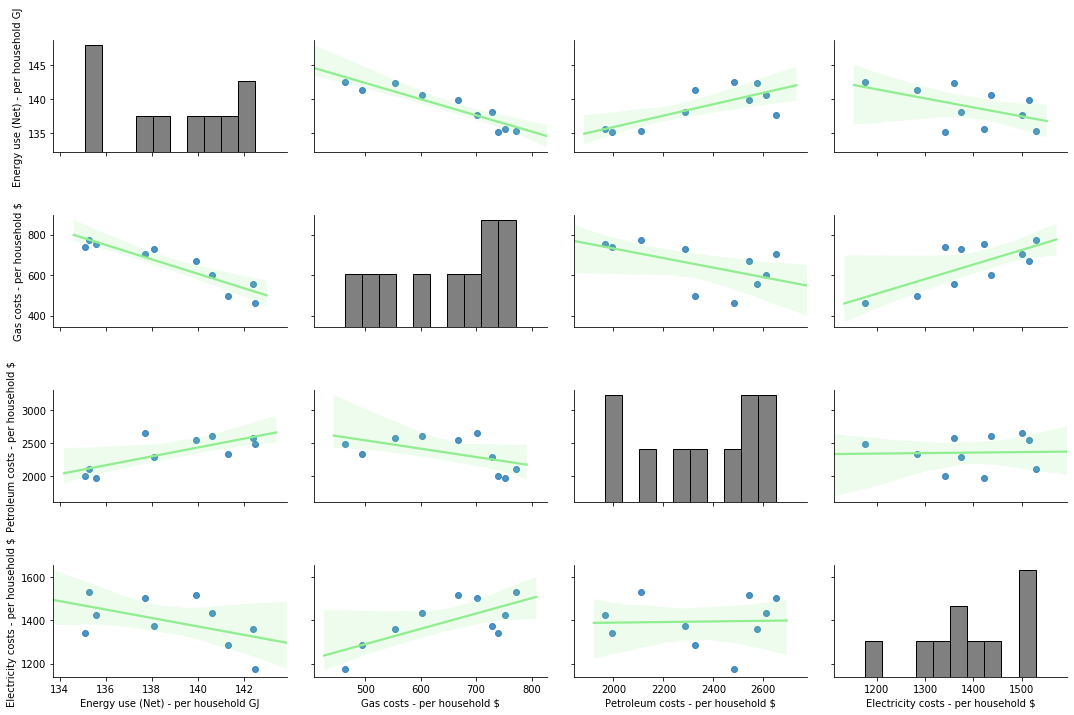

In [23]:
#Investigation of the relationships between Energy Use per Household, gas costs,petroleum costs and electricity costs
sns.pairplot(data=Edframe5, 
            x_vars=['Energy use (Net) - per household GJ','Gas costs - per household $','Petroleum costs - per household $','Electricity costs - per household $'],
            y_vars=['Energy use (Net) - per household GJ','Gas costs - per household $','Petroleum costs - per household $','Electricity costs - per household $'],
            kind='reg',
            aspect=1.5,
            plot_kws={'line_kws':{'color':'lightgreen'}},
            diag_kws={'color':'grey','edgecolor':'black'})

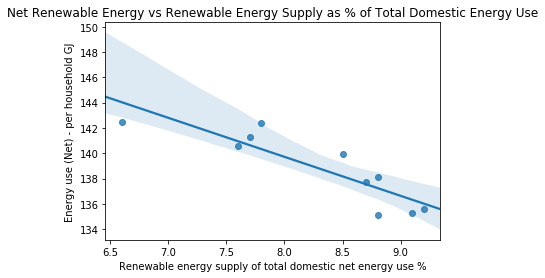

In [24]:
#Comparing Energy Use Renewable energy supply of total domestic net energy use % and Energy Use per Household GJ
Ren_household=sns.regplot(data=Edframe5,x='Renewable energy supply of total domestic net energy use %',y='Energy use (Net) - per household GJ')
Ren_household.set_title('Net Renewable Energy vs Renewable Energy Supply as % of Total Domestic Energy Use')
Ren_household

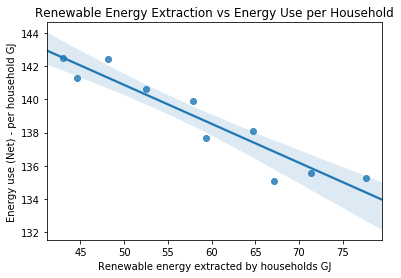

In [25]:
Ren_extraction=sns.regplot(data=Edframe5,x='Renewable energy extracted by households GJ',y='Energy use (Net) - per household GJ')
Ren_extraction.set_title('Renewable Energy Extraction vs Energy Use per Household')
Ren_extraction

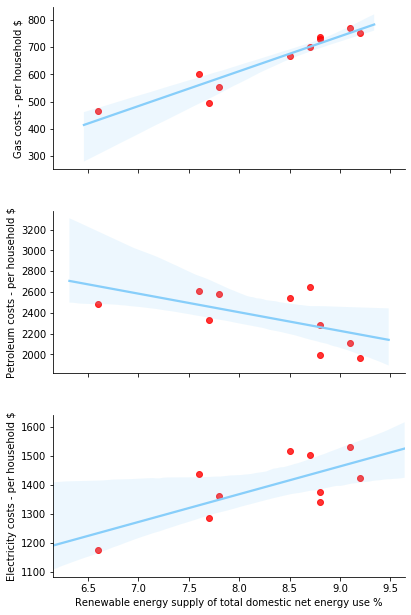

In [26]:
#Comparing relationships between Renewable energy supply of total domestic net energy use % with, gas costs,petroleum costs and electricity costs
sns.pairplot(Edframe5, x_vars=['Renewable energy supply of total domestic net energy use %'],
            y_vars=['Gas costs - per household $','Petroleum costs - per household $','Electricity costs - per household $'],
            kind='reg',
            height=2.9,
            aspect=2,
            plot_kws={'line_kws':{'color':'lightskyblue'},'scatter_kws':{'color':'red'}},
            diag_kws={'color':'orange','edgecolor':'black'})

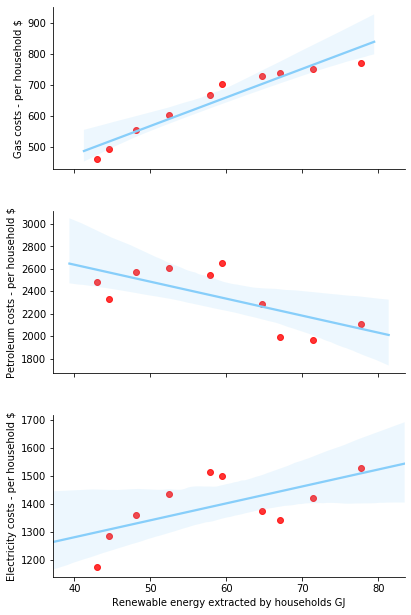

In [27]:
#Comparing Relationships between Renewable Energy Extracted by Households vs Cost of non-renewable energy-sources
sns.pairplot(Edframe5, x_vars=['Renewable energy extracted by households GJ'],
            y_vars=['Gas costs - per household $','Petroleum costs - per household $','Electricity costs - per household $'],
            kind='reg',
            height=2.9,
            aspect=2,
            plot_kws={'line_kws':{'color':'lightskyblue'},'scatter_kws':{'color':'red'}},
            diag_kws={'color':'orange','edgecolor':'black'})